## Mini Project

In [1]:
import pandas as pd
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
import math as m
import numpy as np

In [2]:
path = 'C:/Users/ikram/Downloads'
os.chdir(path)

In [3]:
cities = pd.read_csv('cities.csv', sep=',')
stations=pd.read_csv('stations.csv', sep=',')
providers=pd.read_csv('providers.csv', sep=',')
ticket=pd.read_csv('ticket_data.csv', sep=',')

### *introduction*

TicTactrip, a booking platform for all direct or intermodal journeys, brings together all rail and road (bus and carpooling) transport offers. It is the first multimodal comparator to combine different types of transport on the same journey. TicTactrip allows its clients to create intermodal combinations for travel across Europe. This website is in partnership with the most popular transport companies and firms such as Ouibus, Flixbus, Isilines, SNCF and Blablacar. Their offers are analysed, restructured and combined by the platform, which aims to offer economical journeys.

***1. Data description :***

The cross-section databases is provided by TicTactrip company containing informations about the cities, stations, providers and tickets selected by clients. The number of rows in the four databases are respectively: 8040 in city database, 11035 in stations, 227 in providers and 74168 rows in ticket database and they are described as follows:

In [4]:
print('city')
cities.info()
print('------------------')
print('station')
stations.info()
print('------------------')
print('provider')
providers.info()
print('------------------')
print('ticket')
ticket.info()

city
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
id             8040 non-null int64
local_name     8040 non-null object
unique_name    8039 non-null object
latitude       8040 non-null float64
longitude      8040 non-null float64
population     369 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB
------------------
station
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
id             11035 non-null int64
unique_name    11035 non-null object
latitude       11035 non-null float64
longitude      11035 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB
------------------
provider
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
id                      227 non-null int64
company_id              227 non-null int64
provider_id             213 non-null obje

**cities**

In [5]:
cities

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [6]:
print('The number of rows in dataset is - ' , cities.shape[0])
print('The number of columns in dataset is - ' , cities.shape[1])

The number of rows in dataset is -  8040
The number of columns in dataset is -  6


In [7]:
cities.describe()

,id,latitude,longitude,population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


In [8]:
cities.isna().sum()

id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64

**stations**

In [9]:
stations.describe()

,id,latitude,longitude
count,11035.000000,11035.000000,11035.000000
mean,5518.026914,47.526678,7.580807
std,3185.719813,3.953972,63.655681
min,1.000000,-22.355790,-22.625538
25%,2759.500000,44.896446,1.358655
50%,5518.000000,47.759670,5.824010
75%,8276.500000,50.349956,12.166133
max,11036.000000,64.137571,6645.000000


In [10]:
stations.isna().sum()

id             0
unique_name    0
latitude       0
longitude      0
dtype: int64

- the objectif is to merge the database below with ticket in order to avoid repeated columns

Based on the common columns ['latitude, 'longitude'], the type of merge used is inner

In [11]:
#We've joined the cities & stations depending on the ['latitude','longitude']
data_citi_sta=pd.merge(cities, stations, on=['latitude','longitude'], how='inner',suffixes=('_city','_station'))


In [12]:
data_citi_sta

,id_city,local_name,unique_name_city,latitude,longitude,population,id_station,unique_name_station
0,11788,"Chamonix, Valle d'Aosta, Italia",chamonix-italia,45.817156,6.952375,NaN,8986,Chamonix Mont Blanc- Italie
1,10417,"Chamonix Mont Blanc- Italie, VDA, Italia",chamonix-mont-blanc--italie,45.817156,6.952375,NaN,8986,Chamonix Mont Blanc- Italie
2,12005,"Gare de Lamarche, Grand-Est, France",gare-de-lamarche,48.089980,5.760170,NaN,5678,Lamarche
3,7095,"Lamarche, Grand-Est, France",lamarche,48.089980,5.760170,NaN,5678,Lamarche
4,834,"Tignes Val Claret, Auvergne-Rhône-Alpes, France",tignes-val-claret,45.457331,6.901682,NaN,1078,Tignes Val Claret (Central Bus Station)
...,...,...,...,...,...,...,...,...
4681,8145,"Pont-de-Lignon, Auvergne-Rhône-Alpes, France",pont-de-lignon,45.259610,4.137440,NaN,6941,Pont-de-Lignon
4682,843,"Toulon, Provence-Alpes-Côte d'Azur, France",toulon,43.127797,5.930755,165584.0,526,Gare routière de Toulon
4683,5797,"Bilbao Abando, Euskadi, España",bilbao-abando,43.260300,-2.926600,NaN,4124,Bilbao Abando
4684,5739,"Belgrade, Централна Србија, Serbia",belgrade,44.804400,20.461100,NaN,4051,Belgrade


**providers**

In [13]:
providers

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [14]:
print('The number of rows in dataset is - ' , providers.shape[0])
print('The number of columns in dataset is - ' , providers.shape[1])

The number of rows in dataset is -  227
The number of columns in dataset is -  10


The graph below shows the frequency of using transports:
It shwos that 94.27% of people travel by bus, 0.44% by car, 0.88% by carpooling and 4.40% by train

In [15]:
hd= providers.groupby(by=['transport_type'], as_index = False)['id'].count()

In [16]:
hd

,transport_type,id
0,bus,214
1,car,1
2,carpooling,2
3,train,10


In [17]:
for i in range(len(hd)):
    hd['%']= (hd.loc[:i,'id']/sum(hd['id']))*100

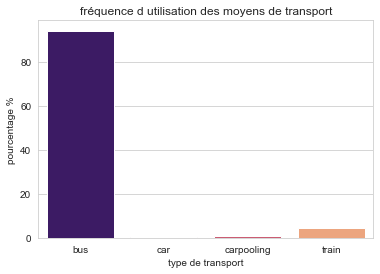

In [18]:
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
sns.barplot(x = hd['transport_type'], y =hd['%'] ,  palette= "magma")
plt.xlabel('type de transport')
plt.ylabel('pourcentage %')
plt.title('fréquence d utilisation des moyens de transport')
plt.show()

**ticket**

In [19]:
ticket

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [20]:
ticket['departure_ts']= pd.to_datetime(ticket['departure_ts'], errors='coerce')
ticket['arrival_ts']= pd.to_datetime(ticket['arrival_ts'], errors='coerce')
ticket['search_ts']= pd.to_datetime(ticket['search_ts'], errors='coerce')

In [21]:
print('The number of rows in dataset is - ' , ticket.shape[0])
print('The number of columns in dataset is - ' , ticket.shape[1])

The number of rows in dataset is -  74168
The number of columns in dataset is -  12


In [22]:
ticket['duration']= ticket['arrival_ts']-ticket['departure_ts']

In [23]:
ticket.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city,duration
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000,74168
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265,0 days 07:04:37.247600
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575,0 days 09:54:58.881351
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000,0 days 00:20:00
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000,0 days 03:00:00
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000,0 days 04:50:00
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000,0 days 08:00:00
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000,20 days 12:51:00


In [24]:
ticket1= ticket.copy()

In [25]:
ticket1

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,0 days 06:10:00
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,0 days 17:50:00
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,0 days 21:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943000+00:00,"{408,408}",{8371},628,562,0 days 13:30:00
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943000+00:00,"{1105,1105}",{9},628,562,0 days 06:30:00
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943000+00:00,"{1105,1105}",{9},628,562,0 days 06:45:00
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943000+00:00,"{863,863}",{13},628,562,0 days 07:45:00


Based on the merge database of cities and stations, we've merged it with the ticket database using inner join method

In [26]:
ticket1=pd.merge(ticket1, data_citi_sta, left_on=['o_city'], right_on =['id_city'],how='inner',suffixes=(None, None))
ticket1=pd.merge(ticket1, data_citi_sta, left_on=['d_city'], right_on =['id_city'],how='inner', suffixes=(None, '_des'))
ticket1=pd.merge(ticket1, providers[['id','fullname', 'has_wifi','has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']], left_on=['company'], right_on =['id'],how='inner', suffixes=(None, '_pr'))

In [27]:
ticket1=ticket1.drop(columns=['id_pr'], axis=1)

In [28]:
pd.set_option('display.max_columns', None)
ticket1

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,id_city,local_name,unique_name_city,latitude,longitude,population,id_station,unique_name_station,id_city_des,local_name_des,unique_name_city_des,latitude_des,longitude_des,population_des,id_station_des,unique_name_station_des,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,06:10:00,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.906270,114977.0,9062,Gare SNCF Orléans,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,861,Parking Circé,Blablacar,False,False,False,False,carpooling
1,6818317,8385,NaN,NaN,2017-10-07 14:30:00+00:00,2017-10-07 17:10:00+00:00,1800,2017-10-07 12:04:51.338000+00:00,NaN,NaN,845,542,02:40:00,845,"Toulouse, Occitanie, France",toulouse,43.613299,1.452226,466297.0,527,Gare routière de Toulouse,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,861,Parking Circé,Blablacar,False,False,False,False,carpooling
2,6818317,8385,NaN,NaN,2017-10-07 14:30:00+00:00,2017-10-07 17:10:00+00:00,1800,2017-10-07 12:04:51.338000+00:00,NaN,NaN,845,542,02:40:00,845,"Toulouse, Occitanie, France",toulouse,43.613299,1.452226,466297.0,10336,Toulouse,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,861,Parking Circé,Blablacar,False,False,False,False,carpooling
3,6818318,8385,NaN,NaN,2017-10-07 14:40:00+00:00,2017-10-07 17:30:00+00:00,1800,2017-10-07 12:04:51.338000+00:00,NaN,NaN,845,542,02:50:00,845,"Toulouse, Occitanie, France",toulouse,43.613299,1.452226,466297.0,527,Gare routière de Toulouse,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,861,Parking Circé,Blablacar,False,False,False,False,carpooling
4,6818318,8385,NaN,NaN,2017-10-07 14:40:00+00:00,2017-10-07 17:30:00+00:00,1800,2017-10-07 12:04:51.338000+00:00,NaN,NaN,845,542,02:50:00,845,"Toulouse, Occitanie, France",toulouse,43.613299,1.452226,466297.0,10336,Toulouse,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,861,Parking Circé,Blablacar,False,False,False,False,carpooling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15506,6821099,216,151.0,11008.0,2017-10-11 13:25:00+00:00,2017-10-11 17:10:00+00:00,5000,2017-10-08 07:57:43.101000+00:00,"{2755,11017}",{8387},694,184,03:45:00,694,"Reims, Grand-Est, France",reims,49.214754,3.994568,183042.0,151,Champagne-Ardenne TGV,184,"Châlons-en-Champagne, Grand-Est, France",chalons-en-champagne,48.990319,4.343920,NaN,1045,Station-service TOTAL Access,Navette de Vatry,False,False,False,False,bus
15507,6835754,8387,151.0,11005.0,2017-10-14 17:00:00+00:00,2017-10-14 20:30:00+00:00,5000,2017-10-11 11:02:33.067000+00:00,"{11017,11017}",{8387},694,184,03:30:00,694,"Reims, Grand-Est, France",reims,49.214754,3.994568,183042.0,151,Champagne-Ardenne TGV,184,"Châlons-en-Champagne, Grand-Est, France",chalons-en-champagne,48.990319,4.343920,NaN,1045,Station-service TOTAL Access,Vatry,NaN,NaN,NaN,NaN,bus
15508,6835755,8387,11013.0,11005.0,2017-10-14 17:00:00+00:00,2017-10-14 20:30:00+00:00,5000,2017-10-11 11:02:33.067000+00:00,"{11017,11017}",{8387},694,184,03:30:00,694,"Reims, Grand-Est, France",reims,49.214754,3.994568,183042.0,151,Champagne-Ardenne TGV,184,"Châlons-en-Champagne, Grand-Est, France",chalons-en-champagne,48.990319,4.343920,NaN,1045,Station-service TOTAL Access,Vatry,NaN,NaN,NaN,NaN,bus
15509,6835756,8387,11014.0,11005.0,2017-10-14 17:00:00+00:00,2017-10-14 20:30:00+00:00,5000,2017-10-11 11:02:33.067000+00:00,"{11017,11017}",{8387},694,184,03:30:00,694,"Reims, Grand-Est, France",reims,49.214754,3.994568,183042.0,151,Champagne-Ardenne TGV,184,"Châlons-en-Champagne, Grand-Est, France",chalons-en-champagne

In [29]:
ticket1=ticket1[['id', 'company', 'other_companies','fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats',
       'has_bicycle', 'transport_type', 'departure_ts', 'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations', 'o_city', 'local_name', 'latitude', 'longitude', 'o_station',
       'unique_name_station', 'duration','d_city', 'local_name_des', 'latitude_des', 'longitude_des',
       'population_des', 'd_station', 'unique_name_station_des']]

In [30]:
ticket1.isna().sum()

id                            0
company                       0
other_companies            6487
fullname                      0
has_wifi                      4
has_plug                      4
has_adjustable_seats          4
has_bicycle                   4
transport_type                0
departure_ts                  0
arrival_ts                    0
price_in_cents                0
search_ts                     0
middle_stations            6487
o_city                        0
local_name                    0
latitude                      0
longitude                     0
o_station                  6487
unique_name_station           0
duration                      0
d_city                        0
local_name_des                0
latitude_des                  0
longitude_des                 0
population_des             5302
d_station                  6487
unique_name_station_des       0
dtype: int64

In [31]:
ticket1.price_in_cents.min()

300

**Price**

In [32]:
print('The min of price is :',str(ticket1.price_in_cents.min()),sep=" ")
print('the mean is :',str(ticket1.price_in_cents.mean()),sep=" ")
print('the max is :',str(ticket1.price_in_cents.max()),sep=" ")

The min of price is : 300
the mean is : 4946.970537038231
the max is : 32000


**Duration**

In [33]:
print('The shortest duration is :',str(ticket1.duration.min()),sep=" ")
print('the mean of duration is :',str(ticket1.duration.mean()),sep=" ")
print('the longest duration is :',str(ticket1.duration.max()),sep=" ")

The shortest duration is : 0 days 00:30:00
the mean of duration is : 0 days 08:20:15.824898
the longest duration is : 13 days 05:45:00


**Distance**

In this section, the objective is to calculate the distance between the departure city and the city of destination based on longitude and latitude. For this, we'll use the haversine distance.

In [34]:
for i in range(len(ticket1)):
    ticket1['distance'] = 6371.01 * np.arccos(np.sin(np.radians(ticket1['latitude'].iloc[:i+1])) * np.sin(np.radians(ticket1['latitude_des'].iloc[:i+1])) + np.cos(np.radians(ticket1['latitude'].iloc[:i+1])) * np.cos(np.radians(ticket1['latitude_des'].iloc[:i+1])) * (np.cos(np.radians(ticket1['longitude'].iloc[:i+1]) - np.radians(ticket1['longitude_des'].iloc[:i+1]))))
ticket1

C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,company,other_companies,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,o_city,local_name,latitude,longitude,o_station,unique_name_station,duration,d_city,local_name_des,latitude_des,longitude_des,population_des,d_station,unique_name_station_des,distance
0,6795025,8385,NaN,Blablacar,False,False,False,False,carpooling,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,611,"Orléans, Centre-Val de Loire, France",47.907018,1.906270,NaN,Gare SNCF Orléans,06:10:00,542,"Montpellier, Occitanie, France",43.604452,3.918318,275318.0,NaN,Parking Circé,503.197957
1,6818317,8385,NaN,Blablacar,False,False,False,False,carpooling,2017-10-07 14:30:00+00:00,2017-10-07 17:10:00+00:00,1800,2017-10-07 12:04:51.338000+00:00,NaN,845,"Toulouse, Occitanie, France",43.613299,1.452226,NaN,Gare routière de Toulouse,02:40:00,542,"Montpellier, Occitanie, France",43.604452,3.918318,275318.0,NaN,Parking Circé,198.546337
2,6818317,8385,NaN,Blablacar,False,False,False,False,carpooling,2017-10-07 14:30:00+00:00,2017-10-07 17:10:00+00:00,1800,2017-10-07 12:04:51.338000+00:00,NaN,845,"Toulouse, Occitanie, France",43.613299,1.452226,NaN,Toulouse,02:40:00,542,"Montpellier, Occitanie, France",43.604452,3.918318,275318.0,NaN,Parking Circé,198.546337
3,6818318,8385,NaN,Blablacar,False,False,False,False,carpooling,2017-10-07 14:40:00+00:00,2017-10-07 17:30:00+00:00,1800,2017-10-07 12:04:51.338000+00:00,NaN,845,"Toulouse, Occitanie, France",43.613299,1.452226,NaN,Gare routière de Toulouse,02:50:00,542,"Montpellier, Occitanie, France",43.604452,3.918318,275318.0,NaN,Parking Circé,198.546337
4,6818318,8385,NaN,Blablacar,False,False,False,False,carpooling,2017-10-07 14:40:00+00:00,2017-10-07 17:30:00+00:00,1800,2017-10-07 12:04:51.338000+00:00,NaN,845,"Toulouse, Occitanie, France",43.613299,1.452226,NaN,Toulouse,02:50:00,542,"Montpellier, Occitanie, France",43.604452,3.918318,275318.0,NaN,Parking Circé,198.546337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15506,6821099,216,{8387},Navette de Vatry,False,False,False,False,bus,2017-10-11 13:25:00+00:00,2017-10-11 17:10:00+00:00,5000,2017-10-08 07:57:43.101000+00:00,"{2755,11017}",694,"Reims, Grand-Est, France",49.214754,3.994568,151.0,Champagne-Ardenne TGV,03:45:00,184,"Châlons-en-Champagne, Grand-Est, France",48.990319,4.343920,NaN,11008.0,Station-service TOTAL Access,35.631915
15507,6835754,8387,{8387},Vatry,NaN,NaN,NaN,NaN,bus,2017-10-14 17:00:00+00:00,2017-10-14 20:30:00+00:00,5000,2017-10-11 11:02:33.067000+00:00,"{11017,11017}",694,"Reims, Grand-Est, France",49.214754,3.994568,151.0,Champagne-Ardenne TGV,03:30:00,184,"Châlons-en-Champagne, Grand-Est, France",48.990319,4.343920,NaN,11005.0,Station-service TOTAL Access,35.631915
15508,6835755,8387,{8387},Vatry,NaN,NaN,NaN,NaN,bus,2017-10-14 17:00:00+00:00,2017-10-14 20:30:00+00:00,5000,2017-10-11 11:02:33.067000+00:00,"{11017,11017}",694,"Reims, Grand-Est, France",49.214754,3.994568,11013.0,Champagne-Ardenne TGV,03:30:00,184,"Châlons-en-Champagne, Grand-Est, France",48.990319,4.343920,NaN,11005.0,Station-service TOTAL Access,35.631915
15509,6835756,8387,{8387},Vatry,NaN,NaN,NaN,NaN,bus,2017-10-14 17:00:00+00:00,2017-10-14 20:30:00+00:00,5000,2017-10-11 11:02:33.067000+00:00,"{11017,11017}",694,"Reims, Grand-Est, France",49.214754,3.994568,11014.0,Champagne-Ardenne TGV,03:30:00,184,"Châlons-en-Champagne, Grand-Est, France",48.990319,4.343920,NaN,11005.0,Station-service TOTAL Access,35.631915


In [35]:
table_comparaison={"0-201":{"train":{"mean_price":0,"mean_duration":0},
                          "bus":{"mean_price":0,"mean_duration":0},
                          "carpooling":{"mean_price":0,"mean_duration":0}},
                 "201-801":{"train":{"mean_price":0,"mean_duration":0},
                          "bus":{"mean_price":0,"mean_duration":0},
                          "carpooling":{"mean_price":0,"mean_duration":0}},
                 "801-2000":{"train":{"mean_price":0,"mean_duration":0},
                          "bus":{"mean_price":0,"mean_duration":0},
                          "carpooling":{"mean_price":0,"mean_duration":0}},
                 "2000+":{"train":{"mean_price":0,"mean_duration":0},
                          "bus":{"mean_price":0,"mean_duration":0},
                          "carpooling":{"mean_price":0,"mean_duration":0}}}

In [36]:
#calcul des moyennes
for t_type in ['train','bus','carpooling']:
    table_comparaison["0-201"][t_type]["mean_price"]=np.mean(ticket1[ticket1.distance<201][ticket1["transport_type"]==t_type].price_in_cents)
    table_comparaison["0-201"][t_type]["mean_duration"]=np.mean(ticket1[ticket1.distance<201][ticket1["transport_type"]==t_type]['duration'])
for t_type in ['train','bus','carpooling']:
    table_comparaison["201-801"][t_type]["mean_price"]=np.mean(ticket1[ticket1.distance<801][ticket1.distance>=201][ticket1["transport_type"]==t_type].price_in_cents)
    table_comparaison["201-801"][t_type]["mean_duration"]=np.mean(ticket1[ticket1.distance<801][ticket1.distance>=201][ticket1["transport_type"]==t_type]['duration'])
for t_type in ['train','bus','carpooling']:
    table_comparaison["801-2000"][t_type]["mean_price"]=np.mean(ticket1[ticket1.distance<2001][ticket1.distance>=801][ticket1["transport_type"]==t_type].price_in_cents)
    print(table_comparaison["801-2000"][t_type]["mean_price"])
    table_comparaison["801-2000"][t_type]["mean_duration"]=np.mean(ticket1[ticket1.distance<2001][ticket1.distance>=801][ticket1["transport_type"]==t_type]['duration'])
for t_type in ['train','bus','carpooling']:
    table_comparaison["2000+"][t_type]["mean_price"]=np.mean(ticket1[ticket1.distance>=2001][ticket1["transport_type"]==t_type].price_in_cents)
    table_comparaison["2000+"][t_type]["mean_duration"]=np.mean(ticket1[ticket1.distance>=2001][ticket1["transport_type"]==t_type]['duration'])

C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


13989.29648241206
6109.732739420935
7427.19298245614


C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\ikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [37]:
pd.DataFrame.from_dict({(i,j): table_comparaison[i][j] 
                           for i in table_comparaison.keys() 
                           for j in table_comparaison[i].keys()},
                       orient='index')

mean_price   mean_duration
0-201    train        4276.229379 04:17:17.721916
         bus          2262.593361 14:50:59.004149
         carpooling   1189.659791 01:52:00.707206
201-801  train       10247.247941 09:40:03.817097
         bus          3640.461910 15:23:59.917269
         carpooling   3771.969697 05:36:27.954545
801-2000 train       13989.296482 12:41:11.758793
         bus          6109.732739 22:02:53.719376
         carpooling   7427.192982 11:09:33.684210
2000+    train                NaN             NaT
         bus                  NaN             NaT
         carpooling           NaN             NaT